<a href="https://colab.research.google.com/github/AngryAbstractV/PaintingEmotion/blob/main/CNNTrainingNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


0
Found 16000 files belonging to 8 classes.
Using 12800 files for training.
Found 16000 files belonging to 8 classes.
Using 3200 files for validation.
['amusement', 'anger', 'awe', 'contentment', 'disgust', 'excitement', 'fear', 'sadness']


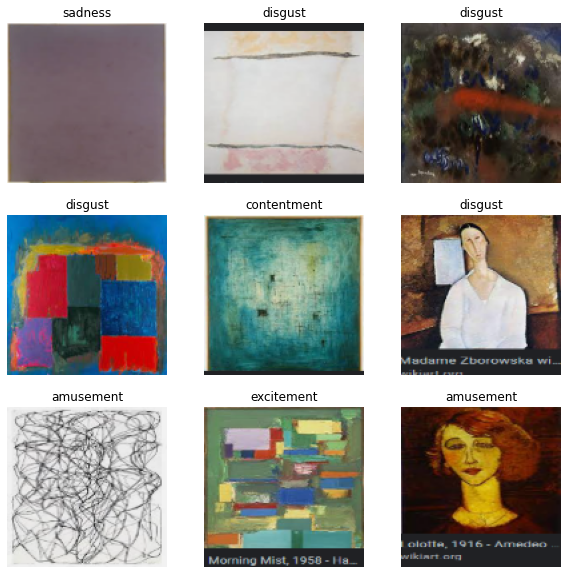

(25, 120, 120, 3)
(25,)
0.023431338 0.9490197
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 120, 120, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)      

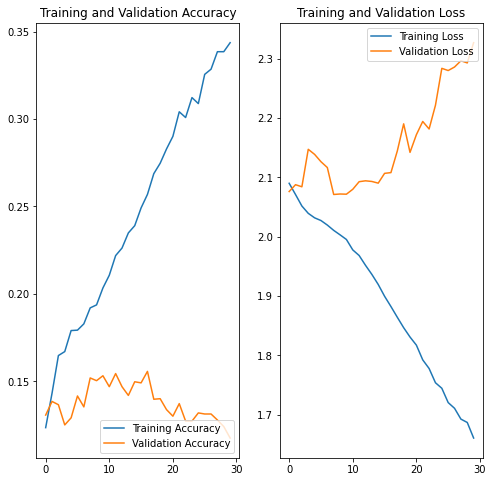

In [ ]:
import os
import pathlib
import matplotlib.image
import numpy as np
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


!mkdir mydata
!cp -r /content/drive/MyDrive/SeniorExp/ArtSamples-2000 /content/mydata

data_dir = pathlib.Path("./mydata/ArtSamples-2000/")

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

batch_size = 25
img_height = 120
img_width = 120

checkpoint_path = "model_{epoch:02d}_a_{accuracy:.4f}_l_{loss:.4f}_va_{val_accuracy:.4f}_vl_{val_loss:.4f}.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1. / 255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(.55, seed=43),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(.35, seed=567),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(.35, seed=34),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.25, seed=45),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks = callbacks_list
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model_path = "model.h5"
model.save(model_path)



mkdir: cannot create directory ‘mydata’: File exists
1083
Found 17083 files belonging to 8 classes.
Using 13667 files for training.
Found 17083 files belonging to 8 classes.
Using 3416 files for validation.
['amusement', 'anger', 'awe', 'contentment', 'disgust', 'excitement', 'fear', 'sadness']


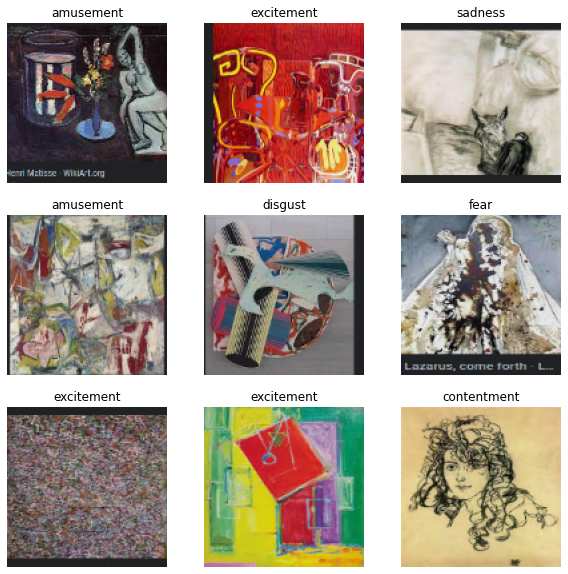

(50, 120, 120, 3)
(50,)
0.0 1.0
94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 24,640,904
Trainable params: 1,053,192
Non-trainable params: 23,587,712
_____

KeyboardInterrupt: ignored

In [ ]:
###############   Pre-trained model with custom output layers       #################





import os
import pathlib
import matplotlib.image
import numpy as np
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


!mkdir mydata
!cp -r /content/drive/MyDrive/SeniorExp/ArtSamples-2000 /content/mydata

data_dir = pathlib.Path("./mydata/ArtSamples-2000/")

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

batch_size = 50
img_height = 120
img_width = 120

checkpoint_path = "model_{epoch:02d}_a_{accuracy:.4f}_l_{loss:.4f}_va_{val_accuracy:.4f}_vl_{val_loss:.4f}.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)


train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1. / 255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)

model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(120,120,3),
                   pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(layers.Dropout(.25, seed=45))
# model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(.10, seed=45))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks = callbacks_list
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model_path = "model.h5"
model.save(model_path)



1/1 [==============================] - 1s 797ms/step
This image most likely belongs to amusement with a 26.05 percent confidence. Should be amusement1.png


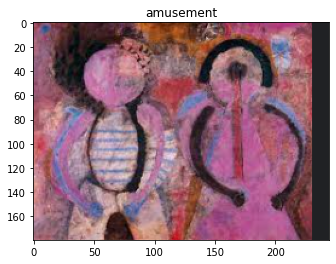

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to amusement with a 22.25 percent confidence. Should be amusement2.png


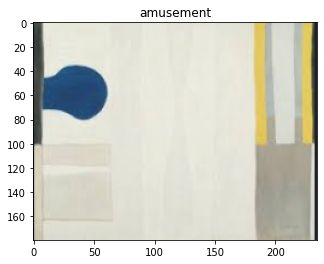

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to anger with a 34.06 percent confidence. Should be anger1.jpg


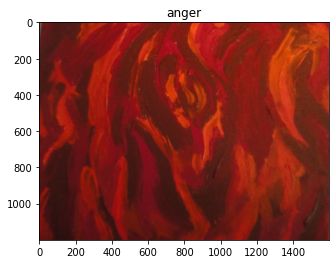

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to fear with a 21.19 percent confidence. Should be anger2.png


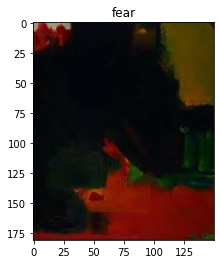

1/1 [==============================] - 0s 22ms/step
This image most likely belongs to fear with a 19.39 percent confidence. Should be awe1.png


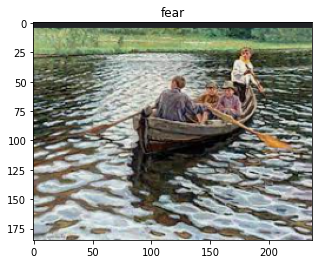

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to contentment with a 15.28 percent confidence. Should be awe2.png


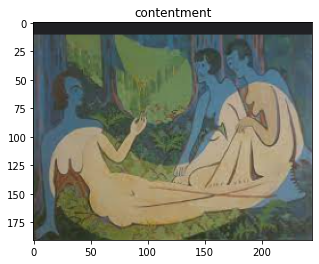

1/1 [==============================] - 0s 22ms/step
This image most likely belongs to awe with a 24.85 percent confidence. Should be contentment1.png


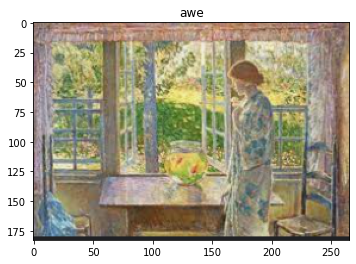

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to disgust with a 28.86 percent confidence. Should be contentment2.png


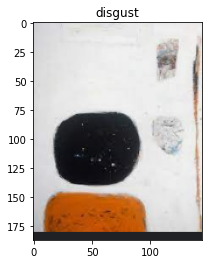

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to contentment with a 30.86 percent confidence. Should be disgust1.png


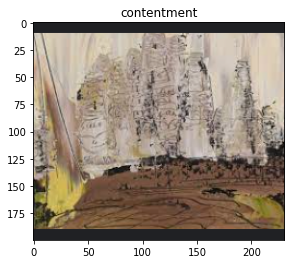

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to disgust with a 20.07 percent confidence. Should be disgust2.png


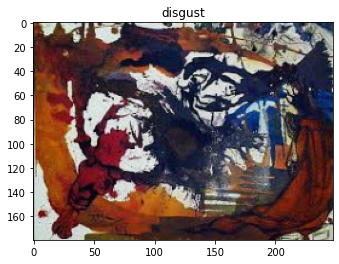

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to contentment with a 30.15 percent confidence. Should be excitement1.png


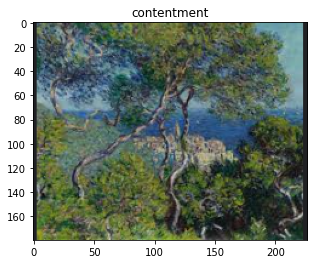

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to excitement with a 21.65 percent confidence. Should be excitement2.png


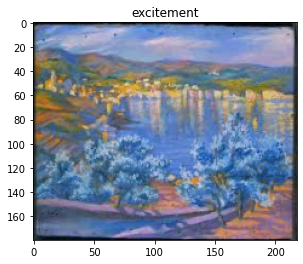

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to excitement with a 13.86 percent confidence. Should be fear1.png


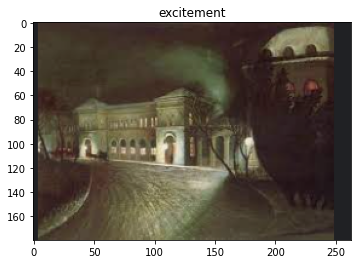

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to disgust with a 15.77 percent confidence. Should be fear2.png


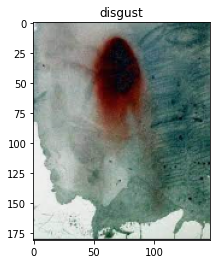

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to anger with a 23.20 percent confidence. Should be sadness1.png


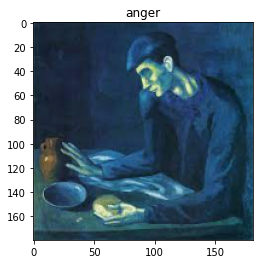

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to disgust with a 17.00 percent confidence. Should be sadness2.jpg


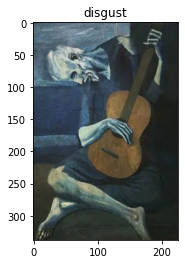

1/1 [==============================] - 0s 28ms/step
This image prediction tensor is [[0.24567442 0.09157145 0.09492092 0.08669309 0.20940846 0.1637004
  0.0752963  0.03273489]]. Belongs to amusement[0], anger[1], contentment[3]


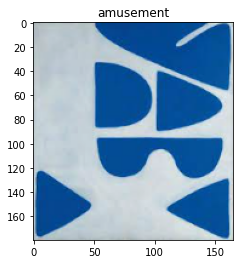

In [ ]:
import os
import pathlib
import matplotlib.image
import numpy as np
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

img_height = 120
img_width = 120

!cp -r /content/drive/MyDrive/SeniorExp/Testing/ /content/mydata
test_path = "./mydata/Testing/amusement1.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# load saved if needed
# !cp -r /content/drive/MyDrive/SeniorExp/ModelCandidates/model_02_a_0.2219_l_1.9617_va_0.1912_vl_2.0101.h5 /content
model = tf.keras.models.load_model('model_02_a_0.2219_l_1.9617_va_0.1912_vl_2.0101.h5')
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()


test_path = "./mydata/Testing/amusement2.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/anger1.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/anger2.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/awe1.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/awe2.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/contentment1.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/contentment2.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/disgust1.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/disgust2.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/excitement1.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/excitement2.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/fear1.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/fear2.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/sadness1.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/sadness2.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. Should be {}"
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions), test_path[17:])
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()

test_path = "./mydata/Testing/11--william-scott_berlin-blues-6-1966.png"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

print(
    "This image prediction tensor is {}. Belongs to amusement[0], anger[1], contentment[3]"
    .format(predictions)
)
img = matplotlib.image.imread(test_path)
plt.imshow(img)
plt.title(class_names[np.argmax(predictions)])
plt.show()


In [ ]:
# save model if good results
!cp -r /content/model_02_a_0.2246_l_1.9618_va_0.2017_vl_2.0016.h5 /content/drive/MyDrive/SeniorExp/ModelCandidates

In [ ]:
!sudo pip3 install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 185 kB 74.2 MB/s 
     |████████████████████████████████| 16.0 MB 33.0 MB/s 
     |████████████████████████████████| 40 kB 7.6 MB/s 
     |████████████████████████████████| 145 kB 75.7 MB/s 
     |████████████████████████████████| 237 kB 94.0 MB/s 
     |████████████████████████████████| 51 kB 8.8 MB/s 
     |████████████████████████████████| 438 kB 60.9 MB/s 
     |████████████████████████████████| 5.9 MB 7.3 MB/s 
     |████████████████████████████████| 1.7 MB 55.8 MB/s 
     |████████████████████████████████| 85 kB 5.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Att

In [ ]:
# import tensorflowjs


!tensorflowjs_converter --input_format=keras '/content/drive/MyDrive/SeniorExp/ModelCandidates/model_02_a_0.2246_l_1.9618_va_0.2017_vl_2.0016.h5' "/content/drive/MyDrive/SeniorExp/json/10-28-2"

2022-10-28 21:09:47.831967: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-28 21:09:49.115278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-28 21:09:49.115910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-10-28 21:09:49.115948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p